In [14]:
import numpy as np
import matplotlib.pyplot as plt


# Symbols (sympy)

it is possible to use symbols in Python using **sympy**. It is way more clumsy than **Mathematica** unfortunately, but still possible.

http://docs.sympy.org/0.7.2/tutorial.html <br>
http://hyperpolyglot.org/computer-algebra <br>
http://hyperpolyglot.org/computer-algebra2 <br>
http://www.scipy-lectures.org/advanced/sympy.html <br>
http://docs.sympy.org/latest/modules/index.html

In [139]:
import sympy
sympy.__version__

'1.1.1'

some input/output handlers and beautifier

In [130]:
from sympy import latex
from sympy.printing.mathml import mathml
from sympy import mathematica_code as mcode
from IPython.display import display

let us introduce some symbols. A symbol is a variable that is handled by sympy 

In [131]:
from sympy.abc import theta, lamda

In [132]:
sympy.init_printing()

In [133]:
display(theta)

In [134]:
y = sympy.sin(theta)

In [106]:
display(y)

In [149]:
print(theta.is_complex)

None


## An function with know integral: the exponential

In [150]:
x, l, z = sympy.symbols('x l z',real=True,positive=True)

In [118]:
sympy.abc.lamda

In [172]:
cdf = sympy.symbols('cdf')
cdf=sympy.integrate(l*sympy.exp(-l*z), (z, 0, x))

In [173]:
display(cdf)

In [174]:
mathml(cdf)

'<apply><minus/><cn>1</cn><apply><exp/><apply><minus/><apply><times/><ci>l</ci><ci>x</ci></apply></apply></apply></apply>'

In [175]:
latex(cdf)

'1 - e^{- l x}'

In [176]:
mcode(cdf)

'1 - Exp[-l*x]'

we evaluate the function _cdf_ with the method _subs_

In [199]:
%timeit cdf.subs([(x,1.0),(l,1.0)])

95.9 µs ± 542 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [206]:
cdf.subs([(x,1.0),(l,1.0)])

In [178]:
sol = sympy.symbols('sol')
sol = sympy.solveset(sympy.Eq(cdf,0.19),x,domain=sympy.S.Reals)
print(sol)

{0.210721031315653/l}


In [179]:
sol.subs([(l,2.2)])

In [181]:
r_values=np.random.rand(5)

In [312]:
r_values

array([ 0.21554971,  0.23280715,  0.52857267,  0.02492478,  0.17433991])

Solve for $x\in \mathbb{R}$: $$CDF(x)=\int^x_0 pdf(z) dz =\xi$$

In [187]:
def solver(xi,laa):
    return (sympy.solveset(sympy.Eq(cdf, xi ),x,domain=sympy.S.Reals)).subs([(l,laa)])

just a different definition in which I substite $\lambda$ before solving

In [184]:
def solver(xi,laa):
    return (sympy.solveset(sympy.Eq(cdf.subs(l,laa), xi ),x,domain=sympy.S.Reals))

In [193]:
r_values=np.random.rand(5)
[ solver(xi,3.0) for xi in  r_values ];

In [192]:
r_values=np.random.rand(5)
list(map(lambda xi: solver(xi,3.0), r_values)) 

In [194]:
print(r_values)

[ 0.51349915  0.54612983  0.92323409  0.45485857  0.13175952]


### Speedup?

https://stackoverflow.com/questions/25803573/speedup-sympy-lamdified-and-vectorized-function

In [201]:
T = cdf.subs([(x,1.0),(l,1.0)])

In [207]:
cdf_lambda_function = sympy.lambdify((x,l), T, "numpy")

In [209]:
cdf_lambda_function((1.0,1.0))

TypeError: <lambda>() missing 1 required positional argument: '_Dummy_2348'

# Numbers

In [210]:
from scipy import integrate
from scipy.optimize import fsolve
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## Known CDF

In [341]:
def CDF(x,lam):
    return 1 - scipy.exp(-lam*x)

In [342]:
CDF(1,1.2)

0.69880578808779781

In [343]:
del eq
def eq(x,lam,xi):
    return CDF(x,lam) - xi
    #return x - lam*xi

In [344]:
r_values=np.random.rand(20000)
_exp_r_values = [ scipy.optimize.root(eq, 0.15 , args=(3.0, xii,)) for xii in r_values ]

In [345]:
 exp_r_values = [ sol['x'] for sol in _exp_r_values if sol['success'] ]

In [346]:
vals=np.transpose(np.array(exp_r_values))[0]

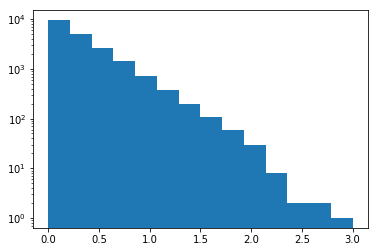

In [347]:
bins = np.linspace(0, 3, 15)
counts, binbegend , p  = plt.hist(vals,bins,log=True)

## CDF is not known

In [211]:
def PDF(x,lam):
    return lam*scipy.exp(-lam*x)

the integratal of the PDF as function of the end of the range. (integrated with classical numerical mathods) 

In [212]:
def CDFi(x,lam):
    return integrate.quad(PDF, 0, x,args=(lam,))

In [213]:
CDFi(1,1.2)

the equation CDF(x) = xi

 $$CDF(x)=\int^x_0 pdf(z) dz =\xi$$

In [216]:
#del eqI
def eqI(x,lam,xi):
    return CDFi(x,lam) - xi
    #return x - lam*xi

Solve for $x\in \mathbb{R}$:

In [352]:
r_values=np.random.rand(20000)
_exp_r_values = [ scipy.optimize.root(eqI, 0.15 , args=(3.0, xii,)) for xii in r_values ]

In [353]:
 exp_r_values = [ sol['x'] for sol in _exp_r_values if sol['success'] ]

In [354]:
len(exp_r_values)

20000

In [355]:
vals=np.transpose(np.array(exp_r_values))[0]

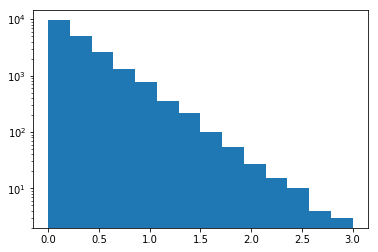

In [356]:
bins = np.linspace(0, 3, 15)
counts, binbegend , p  = plt.hist(vals,bins,log=True)

## CDF is not known

In [857]:
def PDF(x,lam):
    return lam*scipy.exp(-lam*x)

is it normalized on $[0,\infty$]?

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

In [836]:
integrate.quad(PDF, 0, scipy.inf,args=(3.0,),epsrel=0.001)

In [837]:
def CDFi(x,lam):
    return integrate.quad(PDF, 0, x,args=(lam,))

In [838]:
CDFi(1,1.2)

In [839]:
del eqI
def eqI(x,lam,xi):
    return CDFi(x,lam) - xi
    #return x - lam*xi

In [842]:
_exp_r_values[0]

    fjac: array([[-1.]])
     fun: array([ -1.11022302e-16,  -7.77283736e-01])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([  1.88515870e-13])
       r: array([-0.6681488])
  status: 1
 success: True
       x: array([ 0.50061889])

In [840]:
r_values=np.random.rand(20000)
_exp_r_values = [ scipy.optimize.root(eqI, 0.15 , args=(3.0, xii,)) for xii in r_values ]

In [846]:
 exp_r_values = [ sol['x'] for sol in _exp_r_values if sol['success'] ]

In [847]:
len(exp_r_values)

In [848]:
vals=np.transpose(np.array(exp_r_values))[0]

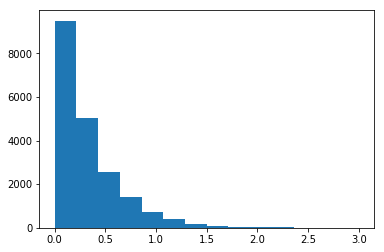

In [849]:
bins = np.linspace(0, 3, 15)
counts, binbegend , p  = plt.hist(vals,bins,log=False)

# Hit or miss (Cos)

In [863]:
def pdf(x,omega):
    return 1+scipy.cos(-omega*x)

plot the PDF

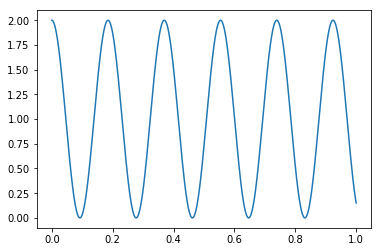

In [864]:
x=np.linspace(0,1,1000);
y=pdf(x,34);
plt.plot(x,y)
plt.show()

In [865]:
def PDF(x,o):
    normalization=integrate.quad(pdf, 0, 1,args=(o,))
    return pdf(x,o)/normalization[0]

In [866]:
integrate.quad(pdf, 0, 1,args=(34.0,))

In [867]:
integrate.quad(PDF, 0, 1,args=(34.0,))

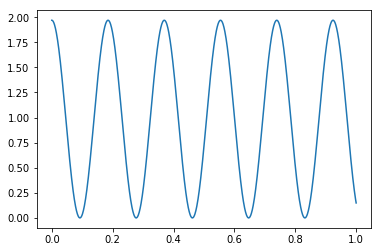

In [868]:
x=np.linspace(0,1,1000);
y=PDF(x,34);
plt.plot(x,y)
plt.show()

try to enclose it in a uniform distribution
$h(x)=1\,\, for\,\, 0<x<1$

In [869]:
max(y)

it is just a contast function $C\cdot h(x)$ for $C=\max_{[0,1]}(y)$

In [870]:
nP=10**5;
x_values=np.random.rand(nP)
pdf_values=PDF(x_values,34);
u_values=np.random.rand(nP)

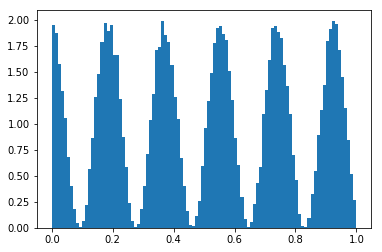

50956


In [872]:
sub_set_x_values=x_values[pdf_values-u_values*max(y)>0]
plt.hist(sub_set_x_values,100,normed=True)
plt.show()
print(len(sub_set_x_values))

In [873]:
10**5/max(y)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.select.html

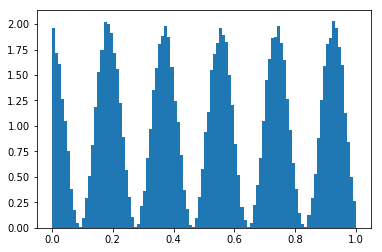

In [441]:
criterion_value=np.row_stack((pdf_values-u_values*max(y)>0,x_values))
selected_values=np.select([criterion_value[0].astype(bool)],[criterion_value[1]])
plt.hist(selected_values[selected_values>0],100,normed=True)
plt.show()

# Hit or miss (Exp)

plot the PDF

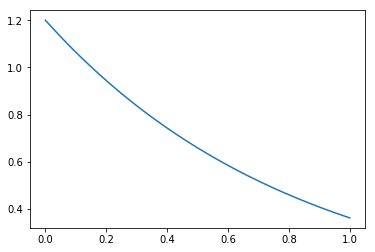

In [858]:
x=np.linspace(0,1,1000);
y=PDF(x,1.2);
plt.plot(x,y)
plt.show()

try to enclose it in a uniform distribution
$h(x)=1\,\, for\,\, 0<x<1$

In [859]:
max(y)

it is just a contast function $C\cdot h(x)$ for $C=\max_{[0,1]}(y)$

In [248]:
_A=np.array([1,2])
_B=np.array([-1,-2])
print(np.row_stack((_A,_B)))
print(np.column_stack((_A,_B)))
print(np.vstack((_A,_B)))
print(np.hstack((_A,_B)))

[[ 1  2]
 [-1 -2]]
[[ 1 -1]
 [ 2 -2]]
[[ 1  2]
 [-1 -2]]
[ 1  2 -1 -2]


In [249]:
_A*_B

array([-1, -4])

In [860]:
nP=10**5;
x_values=np.random.rand(nP)
pdf_values=PDF(x_values,1.2);
u_values=np.random.rand(nP)

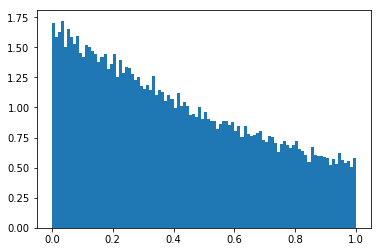

58269


In [862]:
sub_set_x_values=x_values[pdf_values-u_values*max(y)>0]
plt.hist(sub_set_x_values,100,normed=True)
plt.show()
print(len(sub_set_x_values))

https://docs.scipy.org/doc/numpy/reference/generated/numpy.select.html

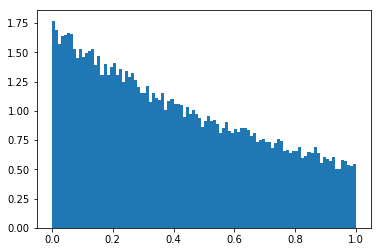

In [343]:
criterion_value=np.row_stack((pdf_values-u_values*max(y)>0,x_values))
selected_values=np.select([criterion_value[0].astype(bool)],[criterion_value[1]])
plt.hist(selected_values[selected_values>0],100,normed=True)
plt.show()

*** Excercise:*** redo this for $x \in [0,10]$ 

# Discrete Distributions

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html

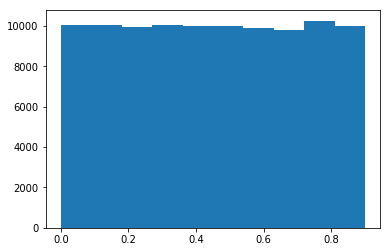

In [40]:
values=np.random.choice(bins, 100000)
plt.hist(values)
plt.show()

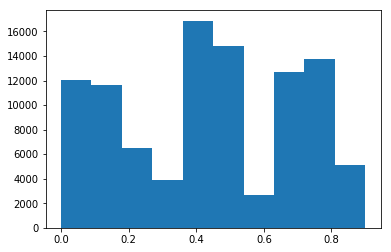

In [38]:
probabilities=np.random.rand(len(bins))
probabilities=probabilities/np.sum(probabilities)
                             
values=np.random.choice(bins, 100000, p=probabilities)
plt.hist(values)
plt.show()

# Discrete (from SciPy)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html

In [59]:
from scipy import stats

In [69]:
tuple(discrete_pdf)

(0.0,
 0.0090049905062727486,
 0.025469959406023771,
 0.046791303235619364,
 0.072039924050181989,
 0.10067885454383056,
 0.13234579127384999,
 0.16677475806666719,
 0.20375967524819016,
 0.24313474366936419)

In [70]:
custm = stats.rv_discrete(name='custm', values=(bins, tuple(discrete_pdf)))

In [72]:
custm.pmf(0.2)

0.0

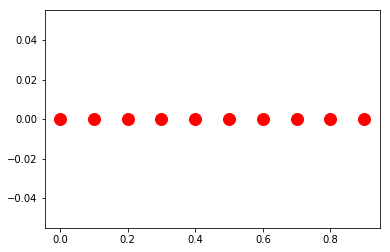

In [63]:
fig, ax = plt.subplots(1, 1)
xk=bins

ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show()

# Competing Forces

## Warm-up

1.0


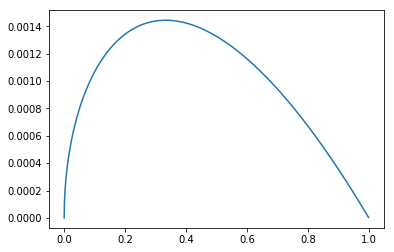

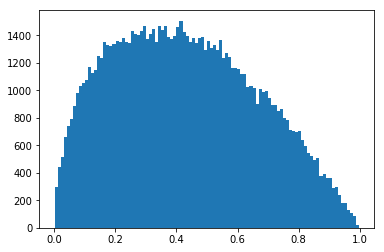

In [345]:
bins=np.arange(0,1,0.001)
discrete_pdf=np.power(bins,0.5)*(1-bins)
discrete_pdf=discrete_pdf/np.sum(discrete_pdf)
#print(bins);
#print(discrete_pdf);
print(np.sum(discrete_pdf))
plt.plot(bins,discrete_pdf)
plt.show()
values=np.random.choice(bins, 100000, p=discrete_pdf)
plt.hist(values,100)
plt.show()

1.0


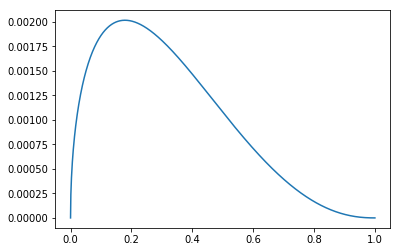

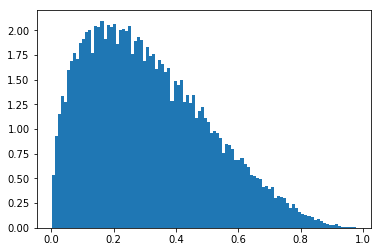

In [496]:
bins=np.arange(0,1,0.001)
discrete_pdf=np.power(bins,0.5)*np.power((1-bins),2.3)
discrete_pdf=discrete_pdf/np.sum(discrete_pdf)
#print(bins);
#print(discrete_pdf);
print(np.sum(discrete_pdf))
plt.plot(bins,discrete_pdf)
plt.show()
values=np.random.choice(bins, 100000, p=discrete_pdf)
plt.hist(values,100,normed=True)
plt.show()

try to see its derivative

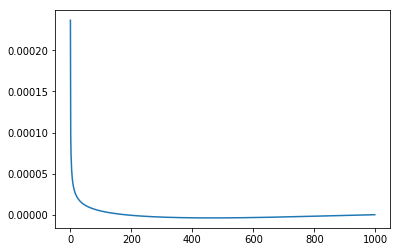

In [484]:
discrete_diff_pdf=np.diff(discrete_pdf)
#print(discrete_diff_pdf)
plt.plot(discrete_diff_pdf)
plt.show()

and its integral

(284, 0.50068259109816515)


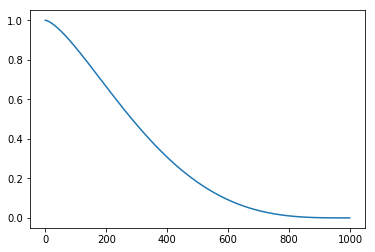

In [485]:
discrete_diff_pdf=1-np.cumsum(discrete_pdf)
print(find_nearest(discrete_diff_pdf,0.5))
#print(discrete_diff_pdf)
plt.plot(discrete_diff_pdf)
plt.show()

a specular behaviour on the other party

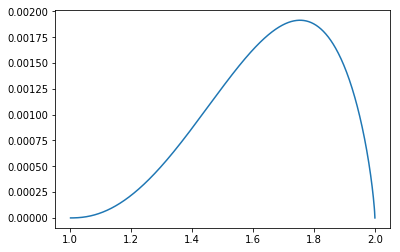

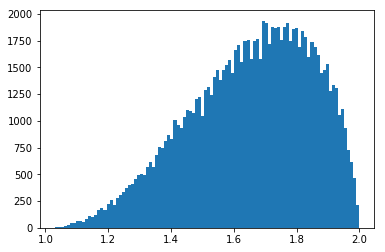

In [486]:
bins=np.arange(0,1,0.001)
discrete_pdf=np.power(bins,0.75)*np.power((1-bins),2.3)
discrete_pdf=discrete_pdf/np.sum(discrete_pdf)
bins=1-(bins-1)
#print(bins);
#print(discrete_pdf);
#print(np.sum(discrete_pdf))
plt.plot(bins,discrete_pdf)
plt.show()
values=np.random.choice(bins, 100000, p=discrete_pdf)
plt.hist(values,100)
plt.show()

(324, 0.49913647232260239)


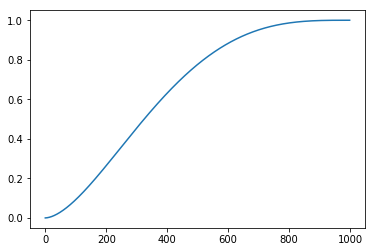

In [487]:
discrete_diff_pdf=np.cumsum(discrete_pdf)
print(find_nearest(discrete_diff_pdf,0.5))
#print(discrete_diff_pdf)
plt.plot(discrete_diff_pdf)
plt.show()

## Tentative modeling

- at each step a buyer and a seller come and make an offer for one unit at a price drawn from distribution of *buy* and *sell* orders at that time
- each bid moves the median buy, each offer moves the median sell (do it for 10 bids)

In [488]:
#find the current median as find_nearest( np.cumsum(pdf_values) ,0.5)
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx,array[idx]

In [541]:
ary=np.array([0,1,2,3])

In [547]:
def midpoint(ary):
    return (ary[1:] + ary[:-1])/2

In [548]:
midpoint(ary)

array([ 0.5,  1.5,  2.5])

### Prototyping

In [825]:
bins=np.arange(0,1,0.001)
binning=np.arange(0,1,0.01)

In [826]:
discrete_pdf=np.power(bins,1)*np.power((1-bins),0.25)
discrete_pdf=discrete_pdf/np.sum(discrete_pdf)
binning=np.sort(1-(binning-1))
bins=1-(bins-1)

In [745]:
discrete_pdf=np.power(bins,11)*np.power((1-bins),1)
discrete_pdf=discrete_pdf/np.sum(discrete_pdf)

1.0


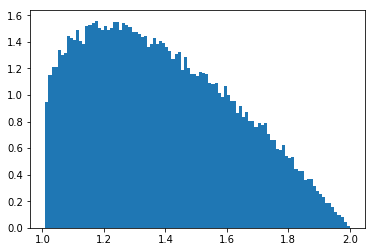

1.383838
1.358


In [827]:

#print(bins);
#print(discrete_pdf);
print(np.sum(discrete_pdf))
values=np.random.choice(bins, 100000, p=discrete_pdf)
_counts,_bins, c = plt.hist(values,bins=binning,normed=True)
plt.show()
print(np.average(values))
print(np.median(values))


In [784]:
pdf_of_counts=_counts/np.sum(_counts)

1.746
1.725


(array([ 1.,  0.,  2.,  0.,  3.,  1.,  0.,  0.,  1.,  2.]),
 array([ 1.525,  1.567,  1.609,  1.651,  1.693,  1.735,  1.777,  1.819,
         1.861,  1.903,  1.945]),
 <a list of 10 Patch objects>)

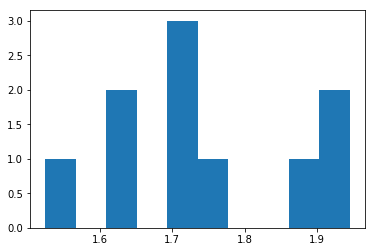

In [785]:
#median0=find_nearest( np.cumsum(pdf_of_counts) ,0.5)
_new_values=np.random.choice(midpoint(_bins), 10, p=pdf_of_counts)
#print(_new_values)
print(np.average(_new_values))
print(np.median(_new_values))
plt.hist(_new_values)

In [786]:
new_values=np.append(values,_new_values)
print(np.average(new_values))
print(np.median(new_values))

1.65396069393
1.676


In [787]:
np.average(new_values)-np.average(values)

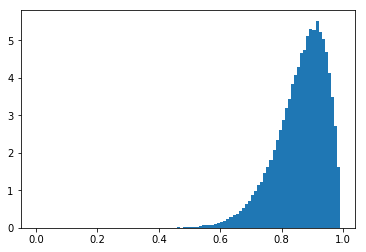

In [725]:
_new_counts,_bins, c = plt.hist(new_values,bins=binning,normed=True);
new_pdf_of_counts=_new_counts/np.sum(_new_counts)
#median1=find_nearest( np.cumsum(new_pdf_of_counts) ,0.5)
#print(median0,median1)

### Function

find the shift of the mean or median (depeding on an optional argument) after nP extractions

In [771]:
def shift_of_metric(metric='average',increment=10,a=0.5,b=2.3, bins=np.arange(0,1,0.001), binning=np.arange(0,1,0.01),opposite=False, interactive=False):
    discrete_pdf=np.power(bins,a)*np.power((1-bins),b)
    discrete_pdf=discrete_pdf/np.sum(discrete_pdf)
    
    if opposite:
        binning=np.sort(1-(binning-1))
        bins=1-(bins-1)
    nRealData=10**4
    values=np.random.choice(bins, nRealData, p=discrete_pdf)
    if interactive:
        _counts,_bins, c = plt.hist(values,bins=binning,normed=True)        # do the histo
        plt.show()
    else:
        _counts,_bins = np.histogram(values,bins=binning,normed=True);
    pdf_of_counts=_counts/np.sum(_counts)
    _new_values=np.random.choice(midpoint(_bins), increment, p=pdf_of_counts)
    #np.average(_new_values)
    #np.median(_new_values)
    new_values=np.append(values,_new_values)
    if metric=="average":
        return np.average(new_values)- np.average(values)
    if metric=="median":
        return np.median(new_values)- np.median(values)

find the distribution of the mean or median shift 

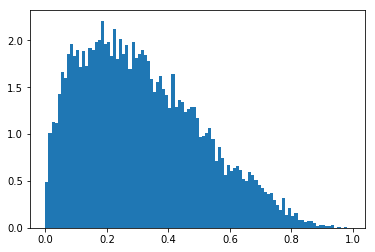

In [772]:
shift_of_metric(increment=10,interactive=True)

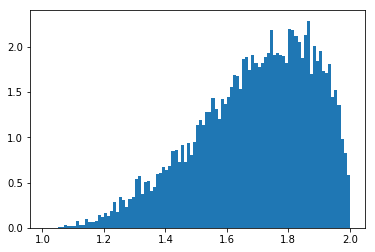

In [790]:
shift_of_metric(increment=10,interactive=True,opposite=True)

In [794]:
def shifts(increment,trials=1000,opposite=False,a=1,b=1):
    return np.array([ shift_of_metric(a=a,b=b,increment=increment,opposite=opposite) for k in range(trials) ])

In [795]:
[ [batch_size, np.log10(np.sqrt(np.var(shifts(batch_size))))] for batch_size in [10,30,100,300,1000,3000,10000] ]

In [796]:
[ [batch_size, np.log10(np.sqrt(np.var(shifts(batch_size,opposite=False))))] for batch_size in [10,30,100,300,1000,3000,10000] ]

In [797]:
[ [batch_size, np.log10(np.abs(np.average(shifts(batch_size))))] for batch_size in [10,30,100,300,1000,3000,10000] ]

In [798]:
[ [batch_size, np.log10(np.abs(np.average(shifts(batch_size,opposite=False))))] for batch_size in [10,30,100,300,1000,3000,10000] ]

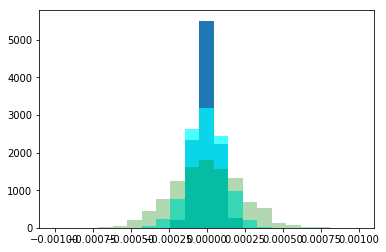

In [804]:
plt.clf()
pips_range=np.linspace(-0.001,0.001,22)
plt.hist(shifts(10),normed=True,bins=pips_range)
plt.hist(shifts(30),normed=True,color='cyan',alpha=0.7,bins=pips_range)
plt.hist(shifts(100),normed=True,color='green',alpha=0.3,bins=pips_range)
#plt.hist(shifts(300),normed=True,color='cyan',alpha=0.7)
#plt.hist(shifts(3000),normed=True,color='green',alpha=0.7)
#plt.hist(shifts(10000),normed=True,color='red',alpha=0.7)

plt.show()

In [828]:
def movement(increment=10,a=1,b=1):
    return shifts(increment,a=a,b=b)-shifts(increment,a=a,b=b,opposite=True)

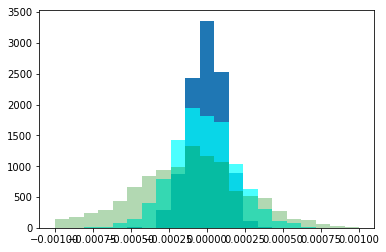

In [833]:
plt.clf()
_A=0.4
_B=0.02
pips_range=np.linspace(-0.001,0.001,22)
plt.hist(movement(10,a=_A,b=_B),normed=True,bins=pips_range)
plt.hist(movement(30,a=_A,b=_B),normed=True,color='cyan',alpha=0.7,bins=pips_range)
plt.hist(movement(100,a=_A,b=_B),normed=True,color='green',alpha=0.3,bins=pips_range)
#plt.hist(shifts(300),normed=True,color='cyan',alpha=0.7)
#plt.hist(shifts(3000),normed=True,color='green',alpha=0.7)
#plt.hist(shifts(10000),normed=True,color='red',alpha=0.7)
del _A,_B
plt.show()

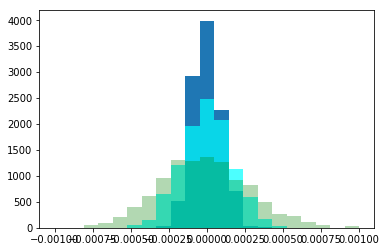

In [832]:
plt.clf()
_A=0.4
_B=1.8
pips_range=np.linspace(-0.001,0.001,22)
plt.hist(movement(10,a=_A,b=_B),normed=True,bins=pips_range)
plt.hist(movement(30,a=_A,b=_B),normed=True,color='cyan',alpha=0.7,bins=pips_range)
plt.hist(movement(100,a=_A,b=_B),normed=True,color='green',alpha=0.3,bins=pips_range)
#plt.hist(shifts(300),normed=True,color='cyan',alpha=0.7)
#plt.hist(shifts(3000),normed=True,color='green',alpha=0.7)
#plt.hist(shifts(10000),normed=True,color='red',alpha=0.7)
del _A,_B
plt.show()